# There are 25 variables:

* ID: ID of each client 
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('UCI_Credit_Card.csv')

In [31]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
print('There are {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

There are 30000 rows and 25 columns.


In [33]:
data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'default.pay'},inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_1        30000 non-null  int64  
 7   PAY_2        30000 non-null  int64  
 8   PAY_3        30000 non-null  int64  
 9   PAY_4        30000 non-null  int64  
 10  PAY_5        30000 non-null  int64  
 11  PAY_6        30000 non-null  int64  
 12  BILL_AMT1    30000 non-null  float64
 13  BILL_AMT2    30000 non-null  float64
 14  BILL_AMT3    30000 non-null  float64
 15  BILL_AMT4    30000 non-null  float64
 16  BILL_AMT5    30000 non-null  float64
 17  BILL_AMT6    30000 non-null  float64
 18  PAY_AMT1     30000 non-null  float64
 19  PAY_

# Exploratory Data Analysis

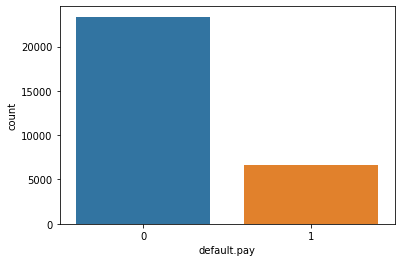

In [35]:
sns.countplot(x='default.pay',data=data)

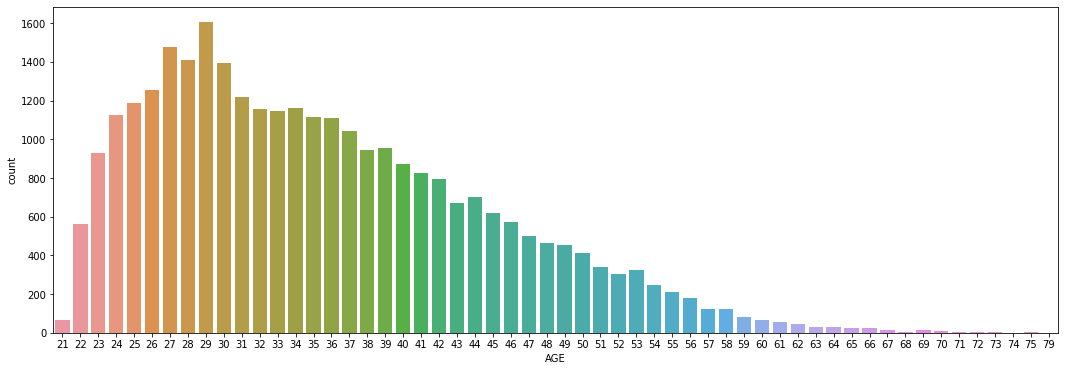

In [36]:
plt.figure(figsize=(18,6))
sns.countplot(x='AGE',data=data)

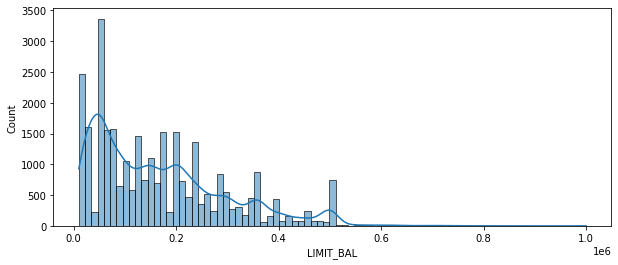

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(x='LIMIT_BAL',data=data,kde=True)
# plt.xlim((0,1e6))

([<matplotlib.axis.XTick at 0x7f0f8cb262d0>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

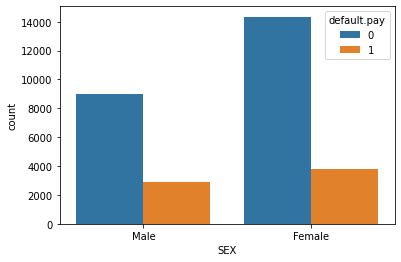

In [38]:
sns.countplot(x='SEX',data=data,hue='default.pay')
plt.xticks([0,1],['Male','Female'])

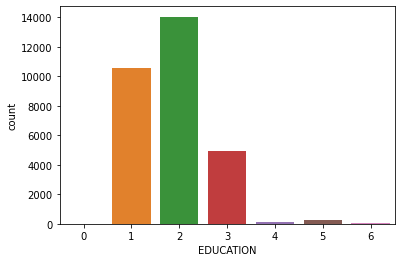

In [39]:
sns.countplot(x='EDUCATION',data=data)

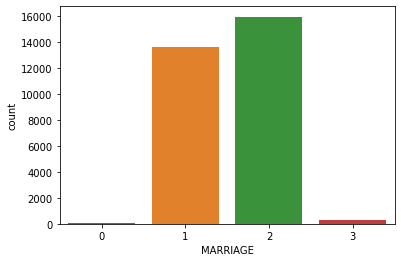

In [40]:
sns.countplot(x='MARRIAGE',data=data)

# Data Cleaning

## Education column

In [41]:
# Checking what all values are there in education column
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [42]:
# 0,5 and 6 denote unknown in education column, so we are replacing 0,6,5 to 4
data['EDUCATION'].replace([0,5,6],4,inplace=True)

## Marriage column

In [43]:
# Checking marriage column for unknown value
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [44]:
# Replacing 0 with 3 which is 'others'
data['MARRIAGE'].replace(0,3,inplace=True)

In [45]:
# Checking for missing values
data.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default.pay    0
dtype: int64

## Pay columns

In [46]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [47]:
cols = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in cols:
  data[col].replace([-2,-1],0,inplace=True)

## Feature Engineering

In [48]:
data.drop('ID',axis=1,inplace=True)

In [49]:
data = pd.get_dummies(data, columns=['SEX'])
data = pd.get_dummies(data, columns=['EDUCATION'])
data = pd.get_dummies(data, columns=['MARRIAGE'])

In [50]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.pay', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [51]:
data.shape

(30000, 30)

# Model Part



In [52]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = data.drop('default.pay',axis=1)
y = data['default.pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##  Logistic Regression



In [54]:
logmodel = LogisticRegression(max_iter=300)

logmodel.fit(X_train,y_train)
pred_log = logmodel.predict(X_test)
train_pred_log = logmodel.predict(X_train)

print(classification_report(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7058
           1       0.00      0.00      0.00      1942

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

[[7056    2]
 [1942    0]]




##  Classification using Decision Trees



In [55]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
train_pred_dtree = dtree.predict(X_train)

print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7058
           1       0.39      0.43      0.41      1942

    accuracy                           0.73      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000

[[5784 1274]
 [1112  830]]


In [56]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
train_pred_rfc = rfc.predict(X_train)

print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6664  394]
 [1243  699]]


## K Nearest Neighbour Classifier

In [57]:
knc = KNeighborsClassifier(n_neighbors=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knc.fit(X_train_scaled,y_train)
pred_knc = knc.predict(X_test_scaled)
train_pred_knc = knc.predict(X_train_scaled)

print(classification_report(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7058
           1       0.36      0.38      0.37      1942

    accuracy                           0.72      9000
   macro avg       0.59      0.60      0.59      9000
weighted avg       0.73      0.72      0.72      9000

[[5709 1349]
 [1196  746]]


Text(0, 0.5, 'Error Rate')

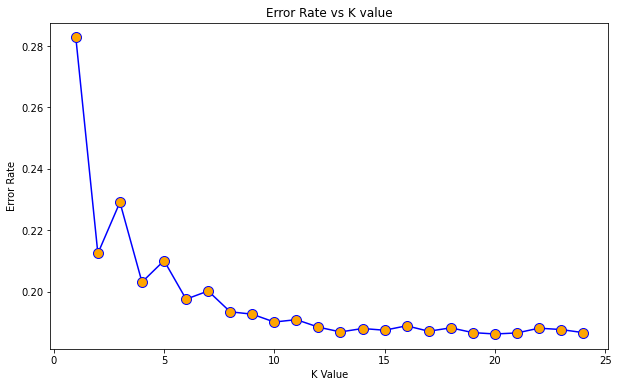

In [58]:
# Choosing the right K (n_neighbors) value
error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_test != pred_i))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue',markerfacecolor='orange',marker='o',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [59]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled,y_train)
pred_knn = knn.predict(X_test_scaled)
train_pred_knn = knn.predict(X_train_scaled)

print('With K = 17, \n')
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

With K = 17, 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7058
           1       0.64      0.31      0.42      1942

    accuracy                           0.81      9000
   macro avg       0.74      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000

[[6717  341]
 [1343  599]]


## Support Vector Machines

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
pred_svc = svc.predict(X_test_scaled)
train_pred_svc = svc.predict(X_train_scaled)

print(classification_report(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.34      0.45      1942

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000

[[6770  288]
 [1287  655]]


## Neural Networks


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [63]:
model = Sequential()

model.add(Dense(29,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [64]:
model.fit(X_train_scaled,
          y_train,
          batch_size=256,
          epochs=100,
          validation_data=(X_test_scaled,y_test))

Epoch 1/100
83/83 [==============================] - 2s 9ms/step - loss: 0.6254 - val_loss: 0.4923
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4984 - val_loss: 0.4477
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4811 - val_loss: 0.4418
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4732 - val_loss: 0.4384
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4663 - val_loss: 0.4368
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4620 - val_loss: 0.4351
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4609 - val_loss: 0.4344
Epoch 8/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4602 - val_loss: 0.4337
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4579 - val_loss: 0.4342
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4557 - val_loss: 0.4327
Epoch 11/

(0.0, 100.0)

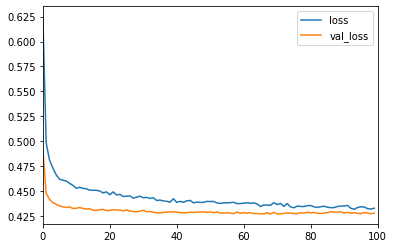

In [65]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
plt.xlim(0,100)

In [66]:
pred_nn = np.round(model.predict(X_test_scaled))
train_pred_nn = np.round(model.predict(X_train_scaled))

print(classification_report(y_test,pred_nn))
print(confusion_matrix(y_test,pred_nn))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.67      0.36      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000

[[6702  356]
 [1234  708]]


# Results

In [68]:
lr1 = accuracy_score(y_test,pred_log)*100
dtr1 = accuracy_score(y_test,pred_dtree)*100
rfc1 = accuracy_score(y_test,pred_rfc)*100
knc1 = accuracy_score(y_test,pred_knc)*100
knn1 = accuracy_score(y_test,pred_knn)*100
svc1 = accuracy_score(y_test,pred_svc)*100
nn1 = accuracy_score(y_test,pred_nn)*100

lr2 = accuracy_score(y_train,train_pred_log)*100
dtr2 = accuracy_score(y_train,train_pred_dtree)*100
rfc2 = accuracy_score(y_train,train_pred_rfc)*100
knc2 = accuracy_score(y_train,train_pred_knc)*100
knn2 = accuracy_score(y_train,train_pred_knn)*100
svc2 = accuracy_score(y_train,train_pred_svc)*100
nn2 = accuracy_score(y_train,train_pred_nn)*100

test_score_dict = {'Logistic Regression':lr1,'Decision Tree Classifier':dtr1,'Random Forest Classifier':rfc1,
              'KNC (n=1)':knc1,'KNC (n=17)':knn1,'Support Vector Machines':svc1,'Neural Networks':nn1}
              
train_score_dict = {'Logistic Regression':lr2,'Decision Tree Classifier':dtr2,'Random Forest Classifier':rfc2,
              'KNC (n=1)':knc2,'KNC (n=17)':knn2,'Support Vector Machines':svc2,'Neural Networks':nn2}

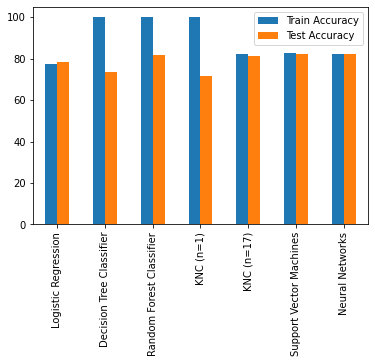

In [69]:
df_scores = pd.DataFrame([train_score_dict,test_score_dict],index=['Train Accuracy','Test Accuracy']).transpose()

df_scores.plot(kind='bar')